In [1]:
from tokenize import group

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters.rank import threshold

In [2]:
# import merged
df = pd.read_parquet('../cache/merged.parquet')

In [3]:
df.columns

Index(['Date', 'Actor1Country', 'Actor1GeoCountry', 'Actor1Type',
       'Actor2Country', 'Actor2GeoCountry', 'Actor2Type', 'ActionCountry',
       'EventType', 'QuadClass', 'GoldsteinScale', 'NumSources', 'NumArticles',
       'AvgTone', 'Source', 'Timestamp', 'Actor1TypeGeneral',
       'Actor2TypeGeneral', 'Magnitude', 'Impact', 'Impact_bin',
       'pct_change_15min', 'pct_change_30min', 'pct_change_24h'],
      dtype='object')

In [4]:
df['AbsChange'] = df['pct_change_30min'].abs()

In [9]:
quants = [0, 0.5, 0.9, 0.99]
mag_quantiles = [df.Magnitude.quantile(i) for i in quants]

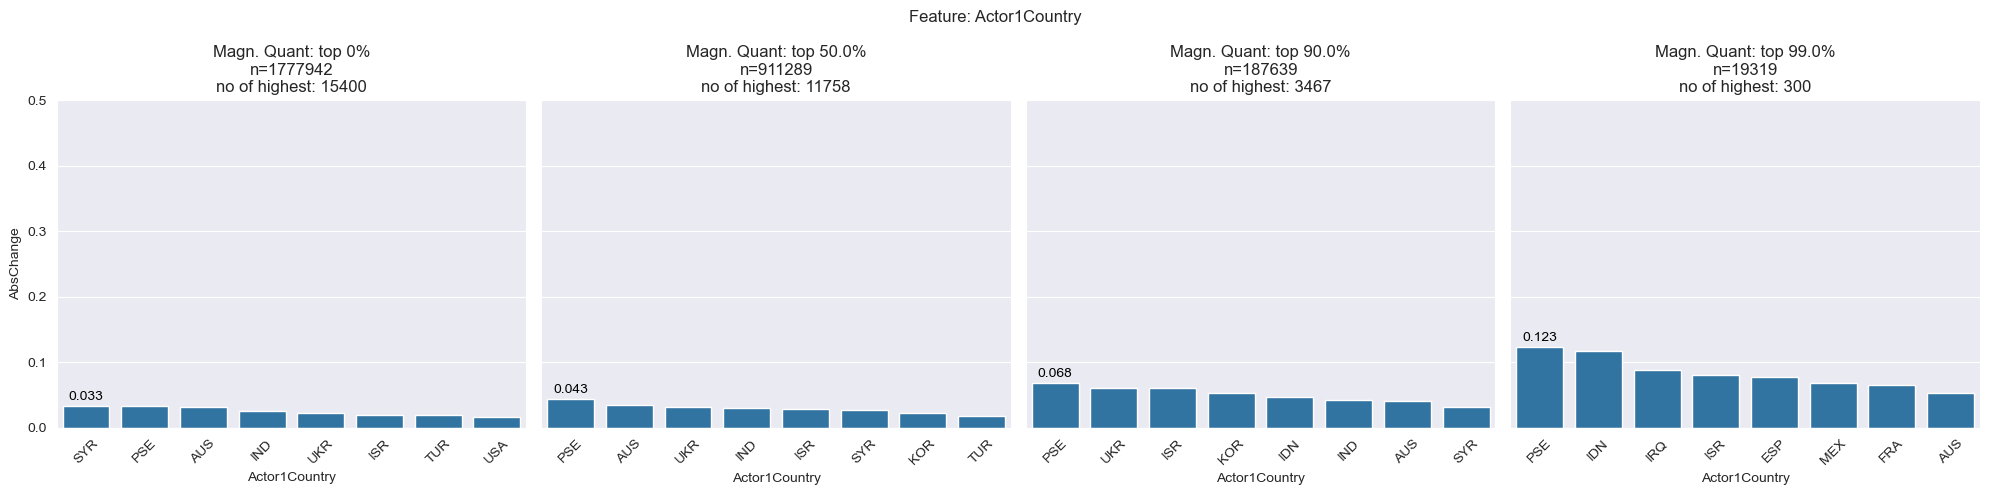

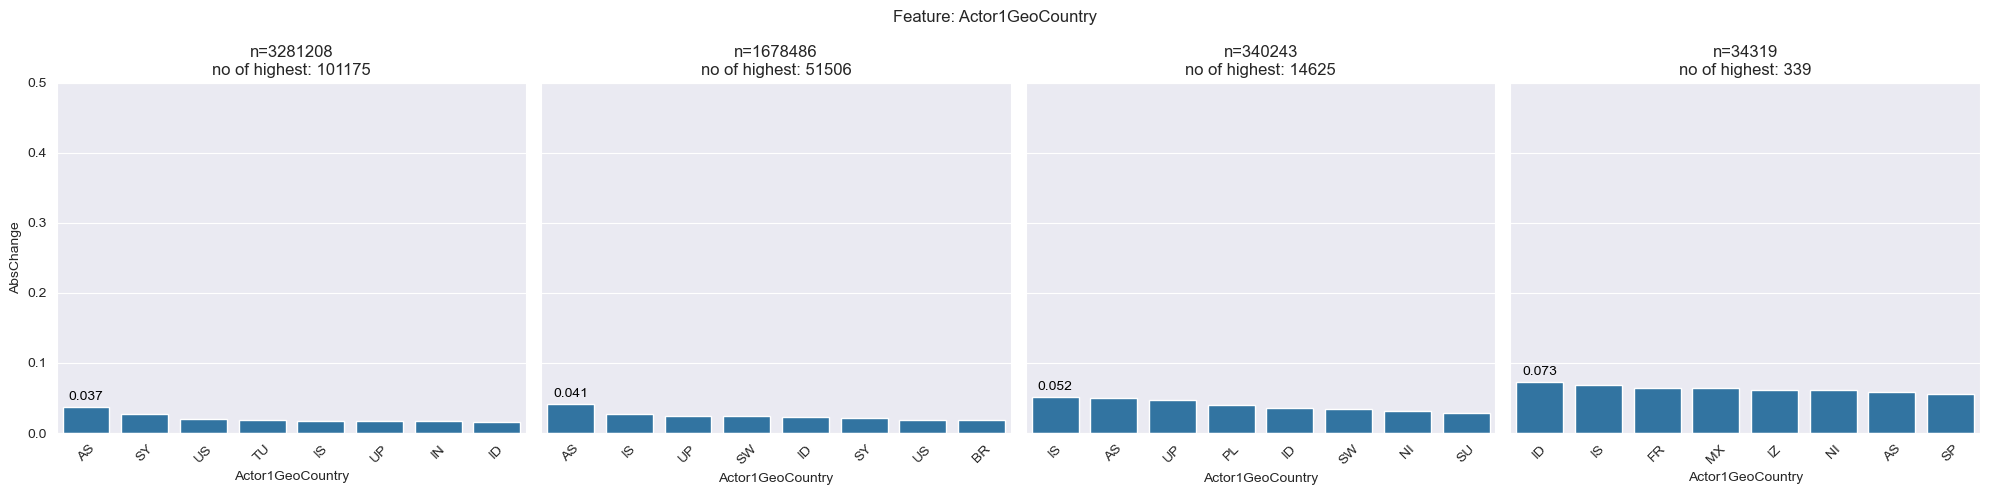

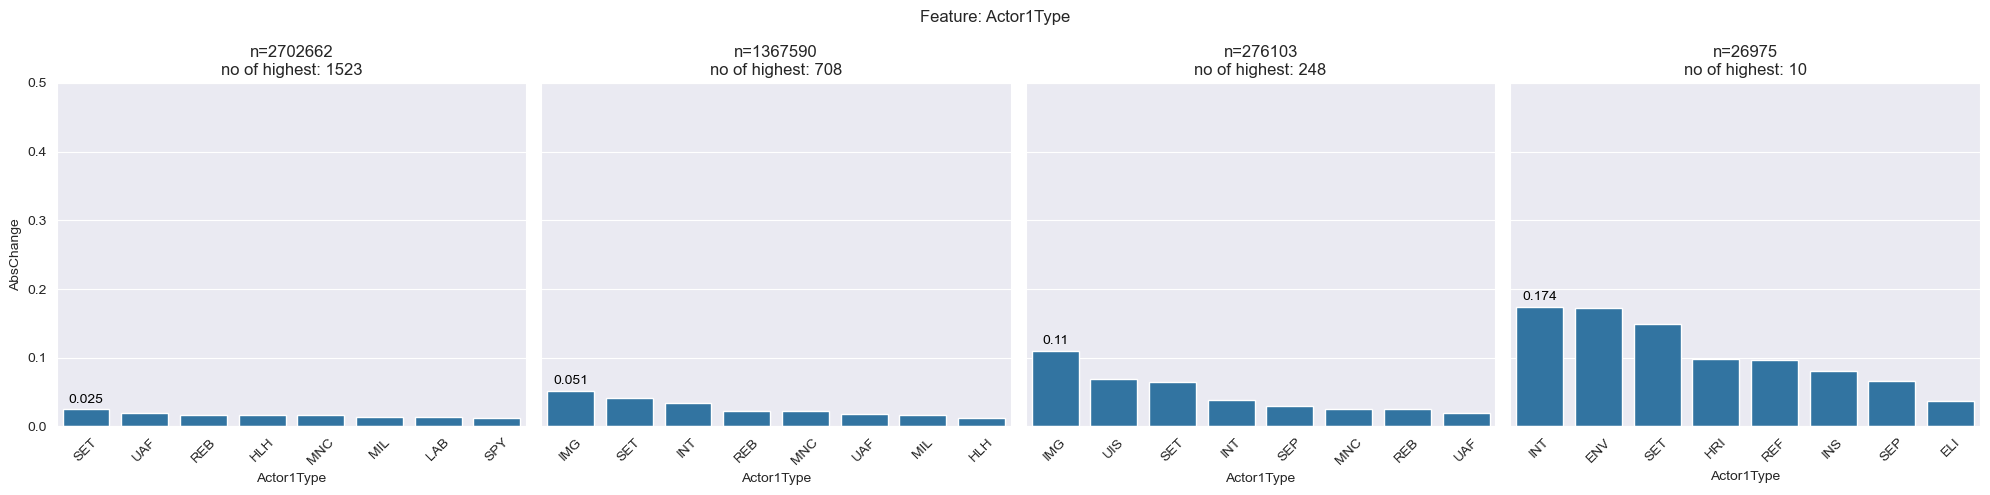

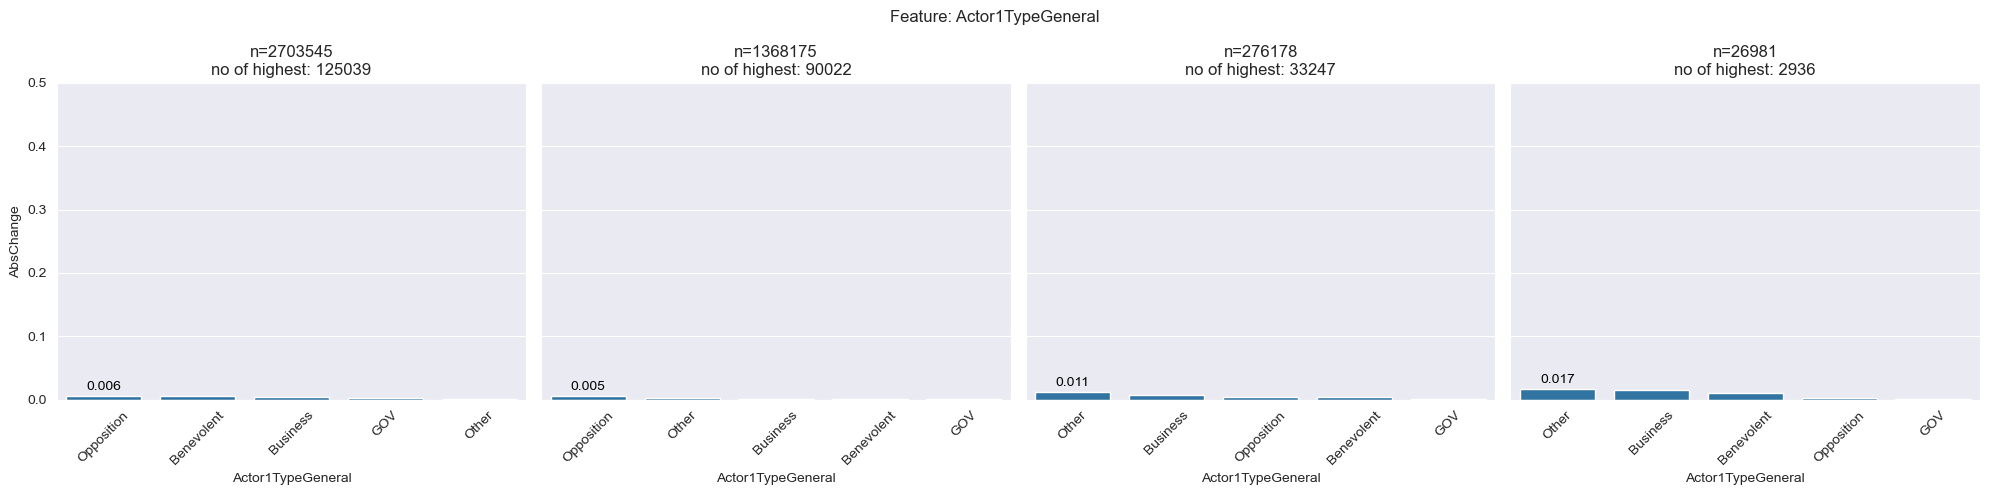

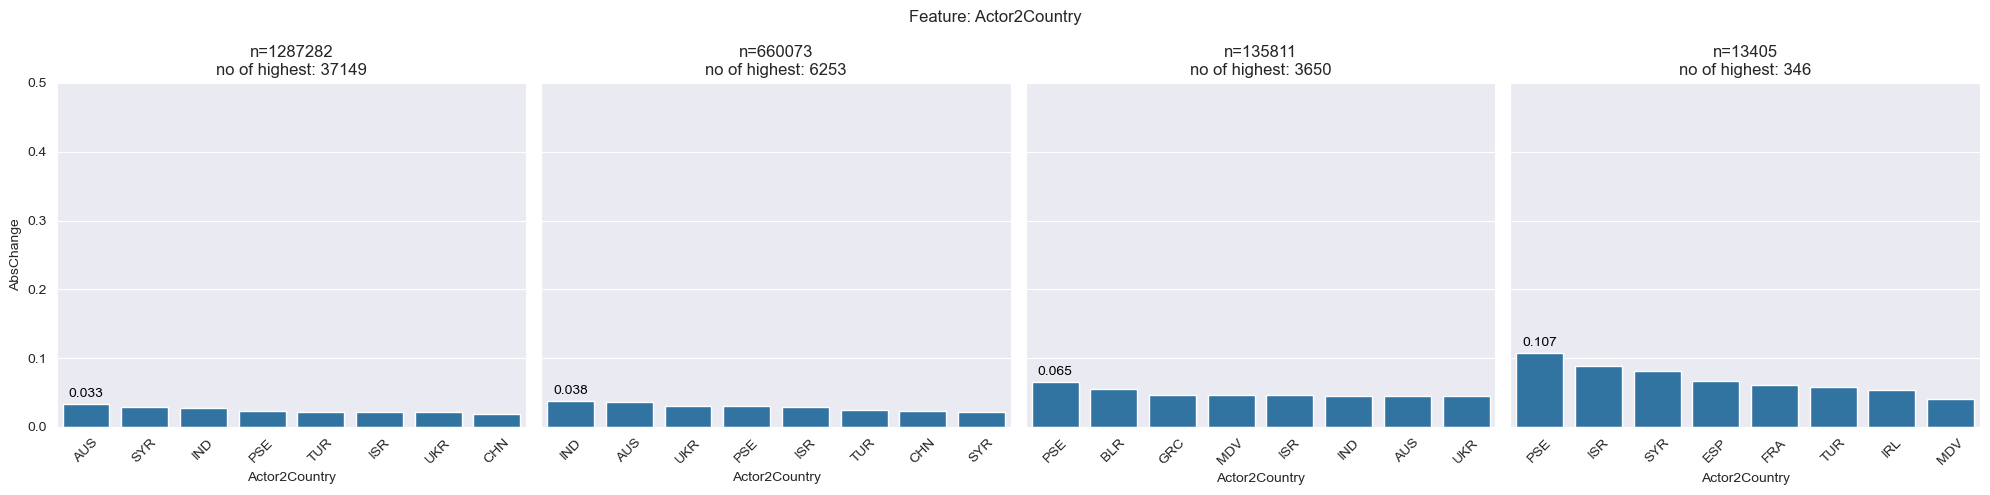

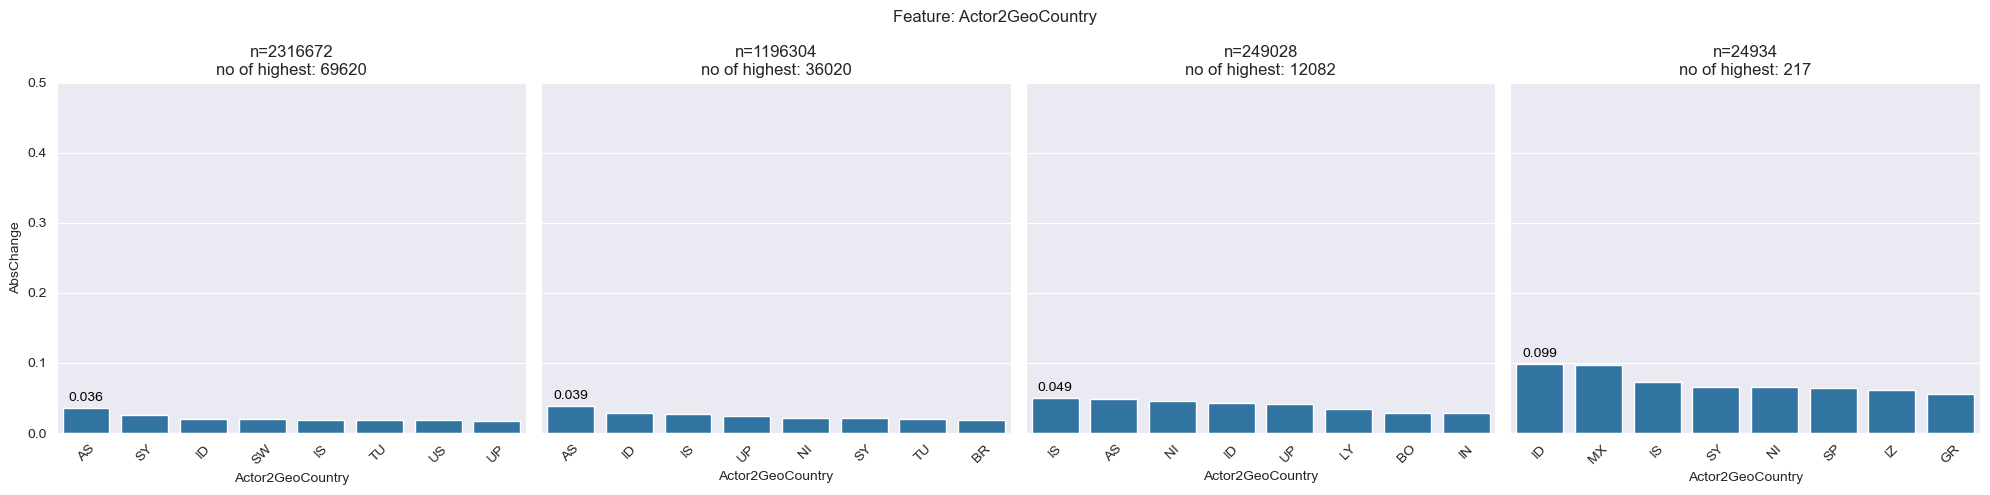

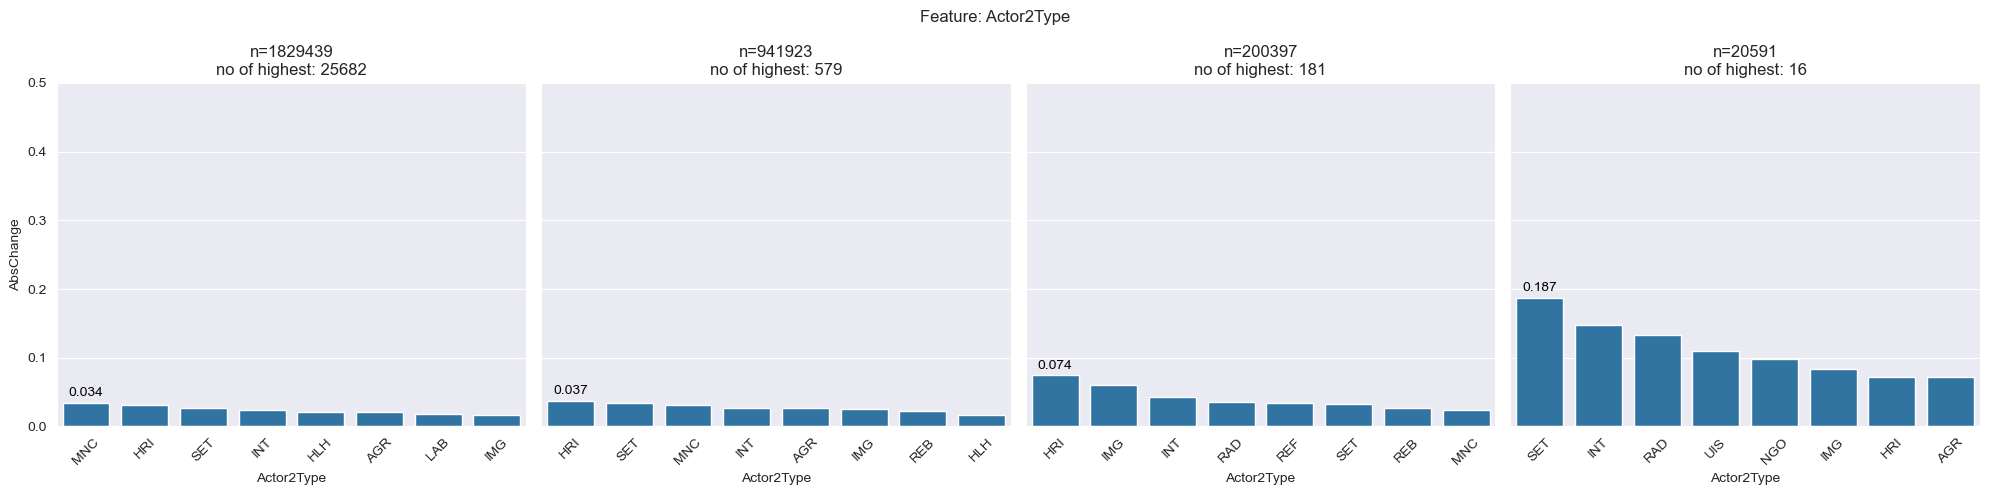

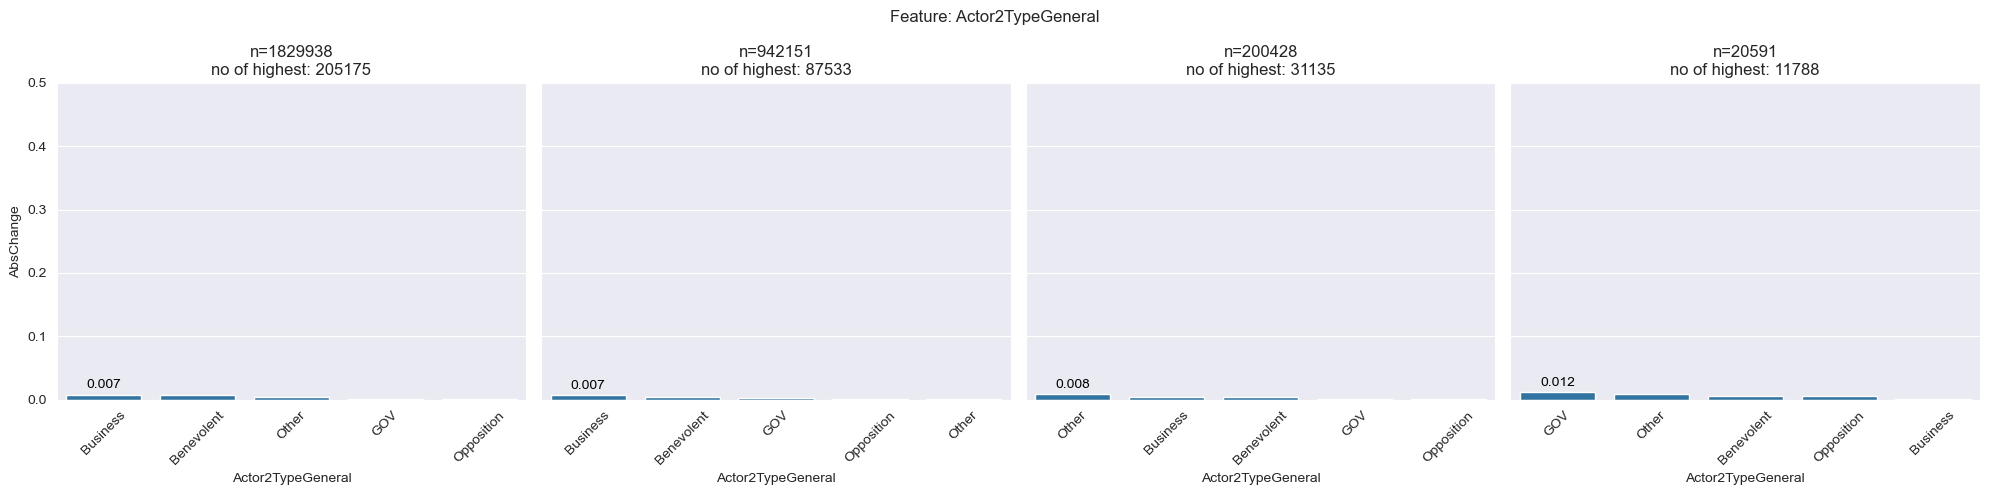

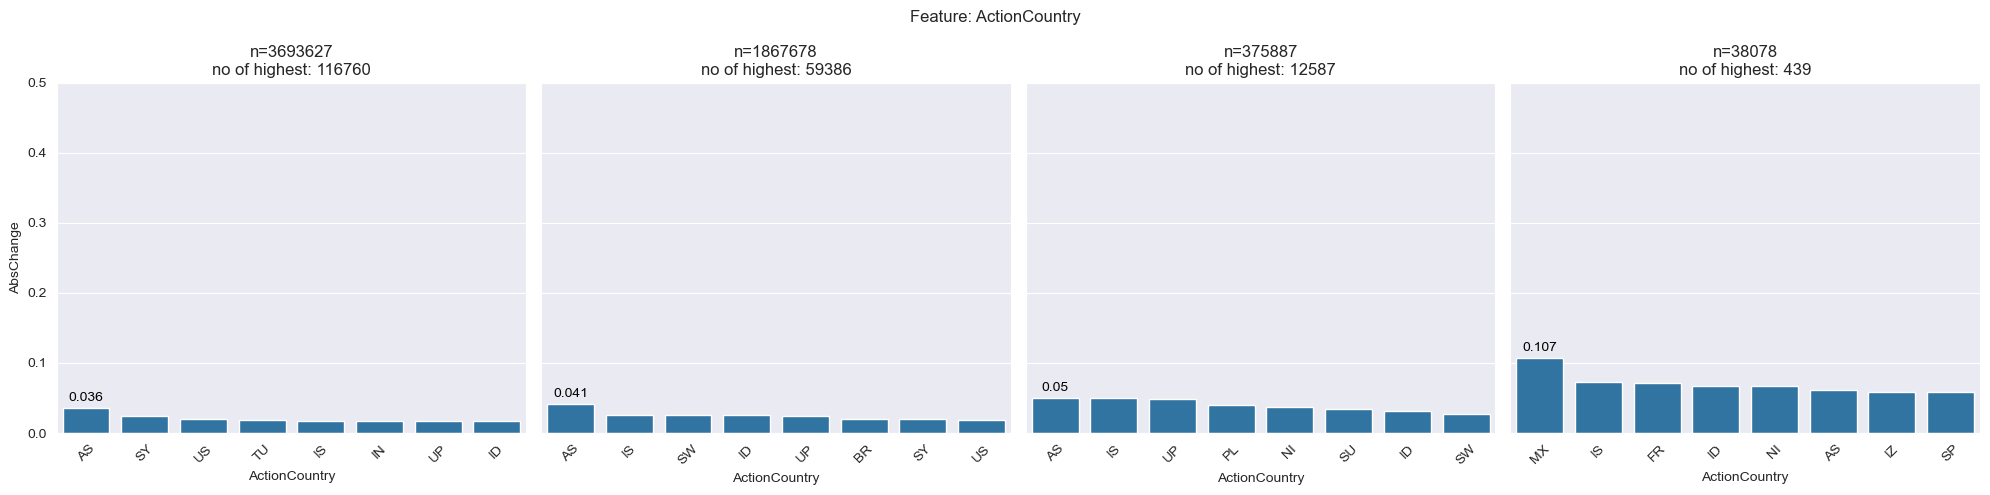

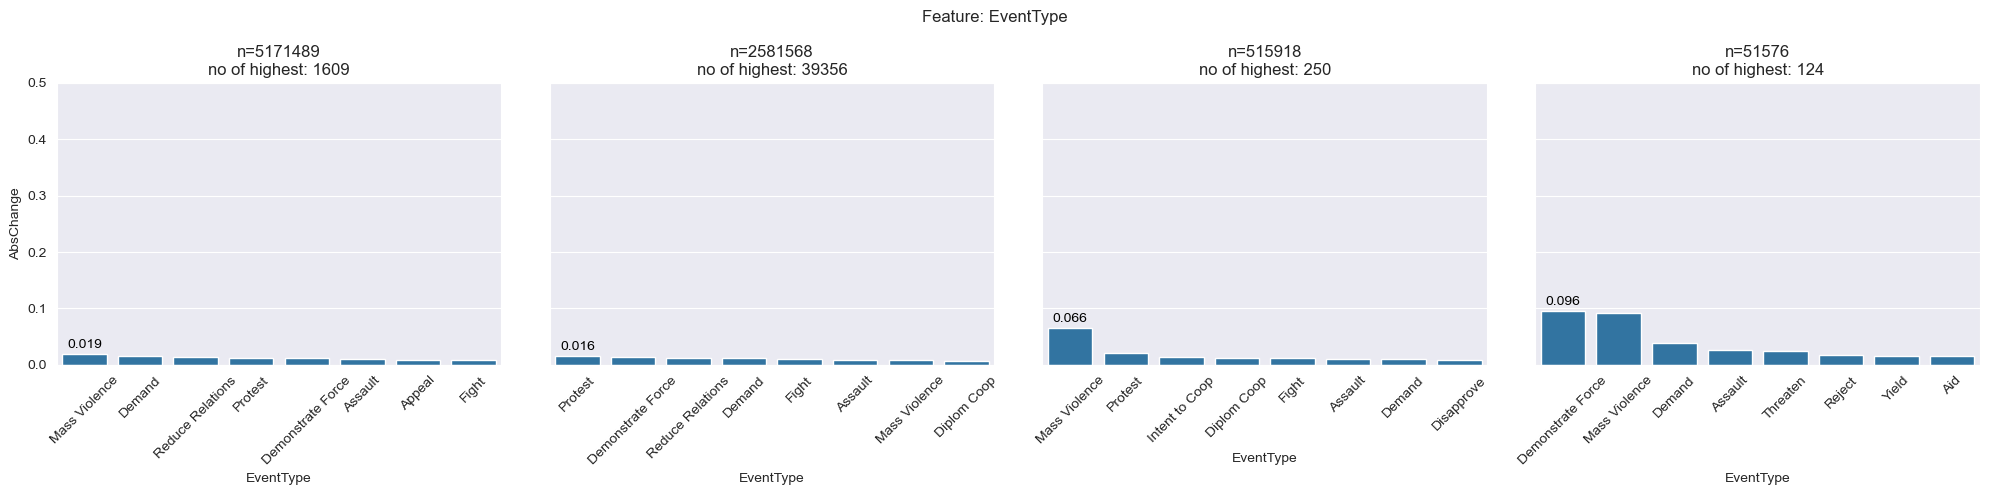

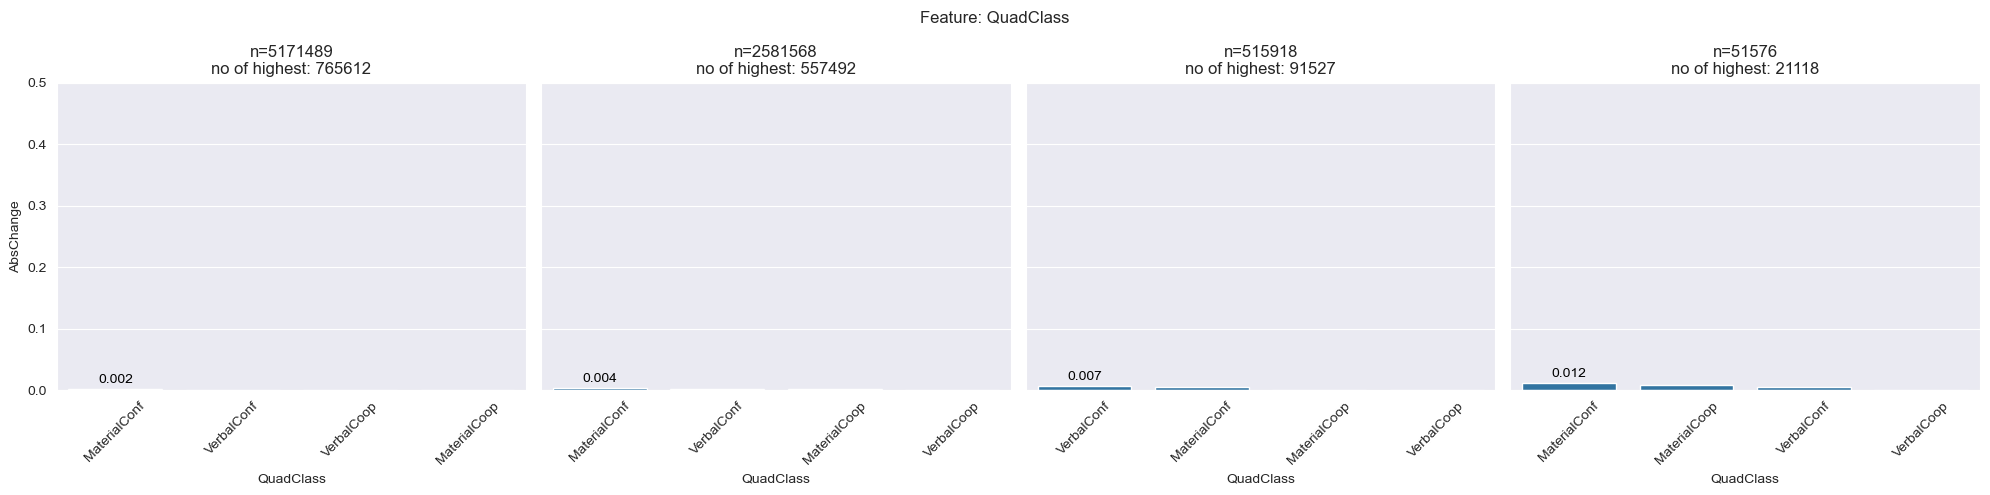

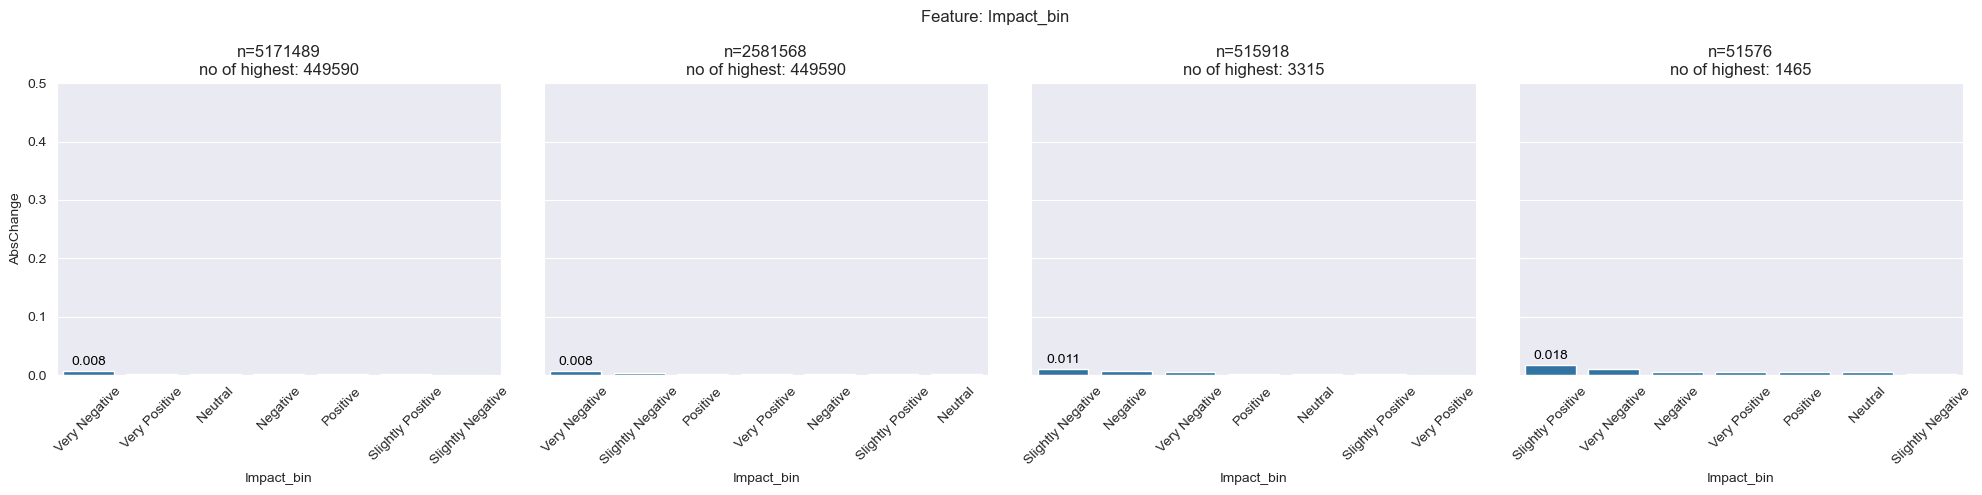

In [12]:
items_to_plot = 8
avg_change = df.AbsChange.mean()
catg_features = ['Actor1Country', 'Actor1GeoCountry', 'Actor1Type', 'Actor1TypeGeneral',
                 'Actor2Country', 'Actor2GeoCountry', 'Actor2Type', 'Actor2TypeGeneral',
                 'ActionCountry', 'EventType', 'QuadClass', 'Impact_bin']
# catg_features = ['Actor1Type']
isFirst = True
for feature in catg_features:
    fig, ax = plt.subplots(1, len(mag_quantiles), figsize=(20, 5), sharey=True)
    for i, mag in enumerate(mag_quantiles):
        df_sub_orig = df[df.Magnitude > mag].astype(object)
        top_countries = df_sub_orig[feature].value_counts().index[:30]
        df_sub = df_sub_orig.groupby(feature).filter(lambda x: x.name in top_countries)
        df_grouped = (df_sub.groupby([feature], observed=True).AbsChange.mean() - avg_change).abs().sort_values(ascending=False)
        df_grouped = df_grouped[:items_to_plot]
        df_grouped = df_grouped.reset_index()
        sns.barplot(x=feature, y='AbsChange', data=df_grouped, ax=ax[i])
        highest = df_grouped.iloc[0]
        ax[i].text(highest.name, highest.AbsChange + 0.01, round(highest.AbsChange, 3), color='black', ha="center")
        
        ax[i].xaxis.set_tick_params(rotation=45)
        if isFirst:
            ax[i].set_title(f'Magn. Quant: top {quants[i] * 100}%\nn={len(df_sub)}\nno of highest: {len(df_sub[df_sub[feature] == highest[feature]])}')
        else:
            ax[i].set_title(f'n={len(df_sub)}\nno of highest: {len(df_sub[df_sub[feature] == highest[feature]])}')
    
    plt.ylabel('Avg. Abs. Change')
    isFirst = False    
    plt.ylim(0, 0.5)
    plt.suptitle(f'Feature: {feature}')
    plt.tight_layout()
    plt.show()

We can see that impact_bin, quadclass, and general types don't carry much information and that geo country values provide slightly more info than regural country values. 

In [7]:
# # let's do similar for numerical features
# num_features = ['AvgTone', 'GoldsteinScale', 'NumSources', 'NumArticles']
# 
# for feature in num_features:
#     fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
#     for i, mag in enumerate(mag_quantiles):
#         df_sub = df[df.Magnitude > mag]
#         sns.barplot(x=feature, y='AbsChange', data=df_sub, ax=ax[i])
#         ax[i].set_title(f'Magnitude quantile: {mag_quantiles[i]}\nn={len(df_sub)}')
#     
#     plt.ylabel('Abs. Change')
#     plt.suptitle(f'Feature: {feature}')
#     plt.tight_layout()
#     plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x13201e340> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x32cf6cc20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 